# Introduction to Seaborn

`Seaborn` is a library for creating data visualizations. More specifically, it is commonly used to create statistical graphs. It is built on top of `matplotlib` but offers a very distinct interface that is closely integrated with `pandas` data structures.

By storing your in a `pandas` `DataFrame` and wrangling it into the right shape, `seaborn` lets you create complex visualizations with only a single line of code.

This notebook follows and expands upon the main points of the [official `seaborn` tutorial](https://seaborn.pydata.org/tutorial.html):

First, we introduce `pandas` and the data structure that `seaborn`'s plotting functions expect. Then, we give an overview of the different categories of plotting functions that `seaborn` offers. Finally, we will produce a variety of example visualizations and discuss how to customize their style.


## Data wrangling

`Seaborn` works best with data that is stored in tabular form in a `pandas` `DataFrame`. Since we want to focus on `seaborn` and data visualization in this session, we do not have time to discuss in-depth `DataFrame`s or the data wrangling capabilities of `pandas`. If you are interested in learning more about that, however, check out our [workshop on data wrangling using `pandas`](https://git.dartmouth.edu/lib-digital-strategies/RDS/workshops/data-science/dirty-data).

For the purposes of this session, we will zoom in on `pandas`' main function how to change the general structure of the data: `pivot`, `melt`, and `wide_to_long`.

To demonstrate these functions, we load two different datasets in two different shapes:


In [1]:
import pandas as pd

penguins_long = pd.read_csv("../data/penguins_long.csv")
flights_wide = pd.read_csv("../data/flights_wide.csv")

### Long-form versus wide-form data

Let's take a look at the two different datasets we loaded:


In [2]:
penguins_long

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
flights_wide

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1949,112,118,132,129,121,135,148,148,136,119,104,118
1,1950,115,126,141,135,125,149,170,170,158,133,114,140
2,1951,145,150,178,163,172,178,199,199,184,162,146,166
3,1952,171,180,193,181,183,218,230,242,209,191,172,194
4,1953,196,196,236,235,229,243,264,272,237,211,180,201
5,1954,204,188,235,227,234,264,302,293,259,229,203,229
6,1955,242,233,267,269,270,315,364,347,312,274,237,278
7,1956,284,277,317,313,318,374,413,405,355,306,271,306
8,1957,315,301,356,348,355,422,465,467,404,347,305,336
9,1958,340,318,362,348,363,435,491,505,404,359,310,337


We notice that they have a very different structure:

In `penguins_wide`, we have one variable per column and one observation per row. In `flights_wide`, we have one row per level of one the variables (`year`), and one column per level of the other variable (the month). Each cell contains a value that is related to the specific levels of the variables shown across the columns and rows (i.e., the value in a particular year and a particular month).

<figure>
<img src="https://seaborn.pydata.org/_images/data_structure_19_0.png" style="width:60%">
<figcaption align="left">Long-form versus wide-form data. Each color denotes a variable.</figcaption>
</figure>

We often see the wide format in spreadsheets with few variables: It is intuitive to a human reader to find the intersection of the levels of interest of the two variables and then read the value. However, if we want to process the dataset computationally, this format has two major disadvantages:

- The meaning of the data is unclear because there is no label that clearly states what the numbers represent
- The format does not scale well to more than three variables: Each new variable would require repeating all levels of the variable expressed in the columns

The long format may seem at first glance much harder to read, but it does not suffer from the above issues: Every variable is clearly labeled by its column header, and adding a variable simply means adding another column.

For computational data processing, we therefore generally prefer the long format, also called [tidy data](https://vita.had.co.nz/papers/tidy-data.pdf)


### How to get your data tidy

Because the wide format is often considered more human-readable, we frequently find wide data tables _in the wild_. Fortunately, `pandas` comes with a set of functions to restructure a `DataFrame`: `melt`, `pivot`, and `wide_to_long`.

The `melt` method lets you move a variable, whose levels are expressed as different columns, to a single column that contains one row per level.

<div class="alert alert-block alert-info">

The name _melt_ probably derives from the metaphor of thinking of the data table as a chunk of ice that you expose to heat on the right: The table will start to "melt" from the right, losing columns that trickle down and pool at the bottom, making the table narrower, and longer.

</div>

Let's try it with the flights data:


In [4]:
flights_long = flights_wide.melt(
    id_vars="year",  # Which column should be used as the identifier variable (not melted)
    # All other columns will be melted!
    var_name="month",  # Name for the new variable/column
    value_name="n_passengers",  # Name for the column holding the values
)
flights_long

,year,month,n_passengers
0,1949,Jan,112
1,1950,Jan,115
2,1951,Jan,145
3,1952,Jan,171
4,1953,Jan,196
...,...,...,...
139,1956,Dec,306
140,1957,Dec,336
141,1958,Dec,337
142,1959,Dec,405


The inverse of the `melt` operation is `pivot`:


In [5]:
flights_long.pivot(
    index="year",  # Which column to use as the index (each level of this variable will be one row)
    columns="month",  # Create a new column for each level of this variable
)

n_passengers                                                       
month          Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
year                                                                     
1949           129  148  118  118  112  148  135  132  121  104  119  136
1950           135  170  140  126  115  170  149  141  125  114  133  158
1951           163  199  166  150  145  199  178  178  172  146  162  184
1952           181  242  194  180  171  230  218  193  183  172  191  209
1953           235  272  201  196  196  264  243  236  229  180  211  237
1954           227  293  229  188  204  302  264  235  234  203  229  259
1955           269  347  278  233  242  364  315  267  270  237  274  312
1956           313  405  306  277  284  413  374  317  318  271  306  355
1957           348  467  336  301  315  465  422  356  355  305  347  404
1958           348  505  337  318  340  491  435  362  363  310  359  404
1959           396  559  405  342  360  548  472  406  420  362  407  463
1960           461  606  432  391  417  622  535  419  472  390  461  508

Finally, the function `wide_to_long` can help you restructure more complex wide-form data with more than three variables. This is beyond the scope of this session, however.

<div class="alert alert-block alert-info">

You actually _can_ use wide-form data to create visualizations in `seaborn`. However, it is strongly encouraged to use long-form data to make the most out of `seaborn`'s ability to structure and label visualizations according to the variables in your data structure.


## The two categories of `seaborn` plotting functions

There is a great variety of plotting functions available within `seaborn`, but all of them fall into one of two categories: _axes-level_ functions or _figure-level_ functions.

An axes-level function is very similar to a `matplotlib` plotting function: It creates and returns a self-contained, single-axes plot.

A figure-level function, on the other hand, lets you create multiple axes with just a single line of code. We will see some examples of this in a little bit.

Figure-level functions also offer a single interface to multiple different axes-level functions:

<figure>
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" style="width:60%">
<figcaption align="left">Organization of figure- and axes-level functions.</figcaption>
</figure>

In the next couple of sections, we will see how to use both kinds of functions.


## Visualizing statistical relationships

Two kinds of charts can be used to show the relationship between two or more variables: line plots and scatter plots.

Line plots work best when you have clear, continuous independent and dependent variables. The flights data, for example, is a time series and therefore fits this description.

You can create a line plot with `seaborn` by using the function `lineplot`, passing it the data, and specifying the name of the variable to be shown on the _x_ and _y_ axis, respectively:


<Axes: xlabel='month', ylabel='n_passengers'>

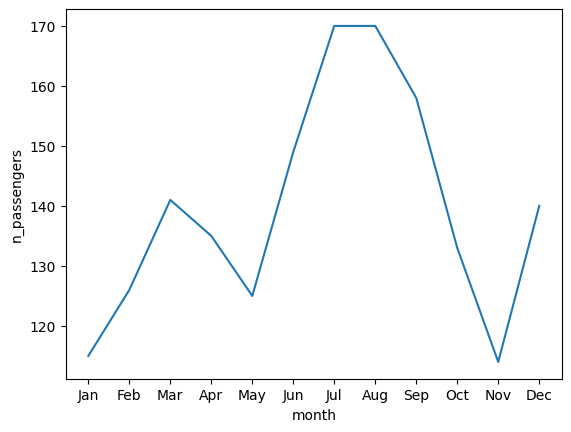

In [6]:
import seaborn as sns

sns.lineplot(flights_long.query("year == 1950"), x="month", y="n_passengers")

In the above example, we only showed the series of a single year. If we keep the data from all years, there are now multiple values for `n_passengers` that we want to plot for each value of `month`. In this case, when there are several _y_ values for the same value of _x_, `seaborn` shows the mean of these values and the confidence interval:


<Axes: xlabel='month', ylabel='n_passengers'>

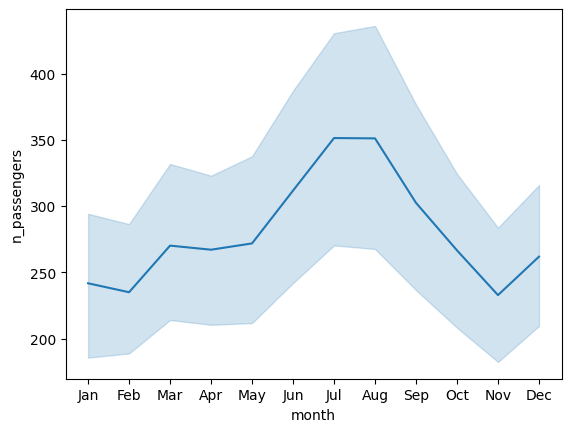

In [7]:
sns.lineplot(flights_long, x="month", y="n_passengers")

If instead we would like to see a different line per year, we can use the `style` paramter. If we specify a variable as the argument, the data will be grouped by that variable and each group will be plotted with a different line style:


<Axes: xlabel='month', ylabel='n_passengers'>

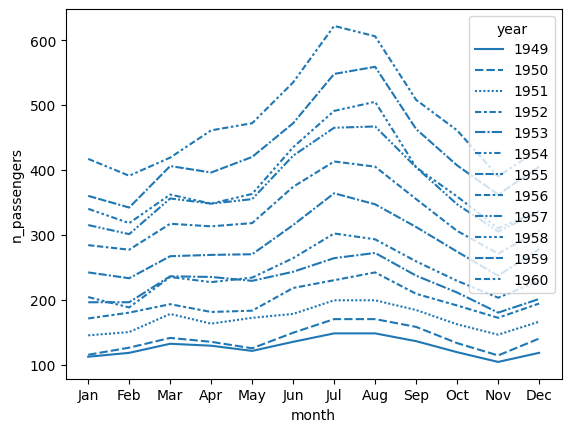

In [8]:
sns.lineplot(flights_long, x="month", y="n_passengers", style="year")

If the grouping variable has more than a few levels, this can be hard to process for the human eye, however. We could therefore also change the color of each line using the `hue` parameter:


<Axes: xlabel='month', ylabel='n_passengers'>

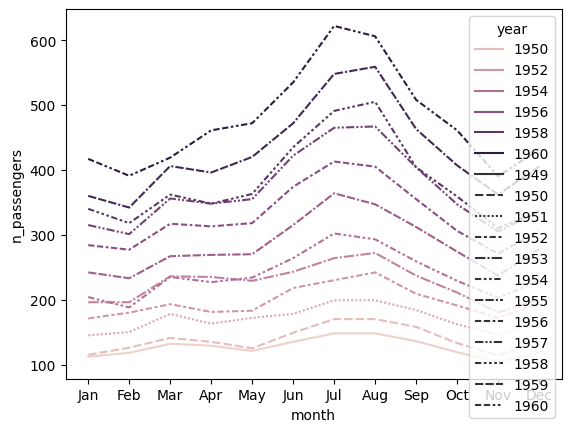

In [9]:
sns.lineplot(flights_long, x="month", y="n_passengers", style="year", hue="year")

The penguins dataset is a good example for a collection of observations that do not have a sequential relationship. We could therefore visualize some of the variables in a scatter plot:


<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

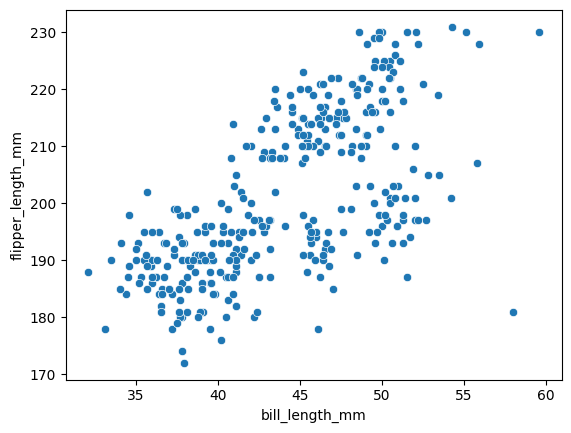

In [11]:
sns.scatterplot(penguins_long, x="bill_length_mm", y="flipper_length_mm")

Once again, we can use a categorical variable to plot different subgroups of the data differently. For example, we could plot each species in a different color:


<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

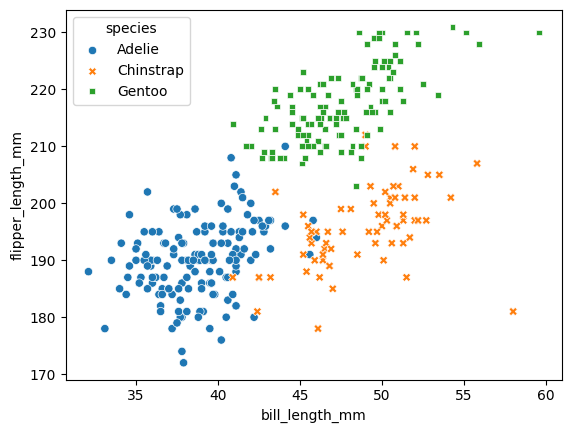

In [13]:
sns.scatterplot(
    penguins_long,
    x="bill_length_mm",
    y="flipper_length_mm",
    hue="species",
    style="species",
)

Since the interface of these functions is so similar, the figure-level function `relplot` can be used to create either of them:


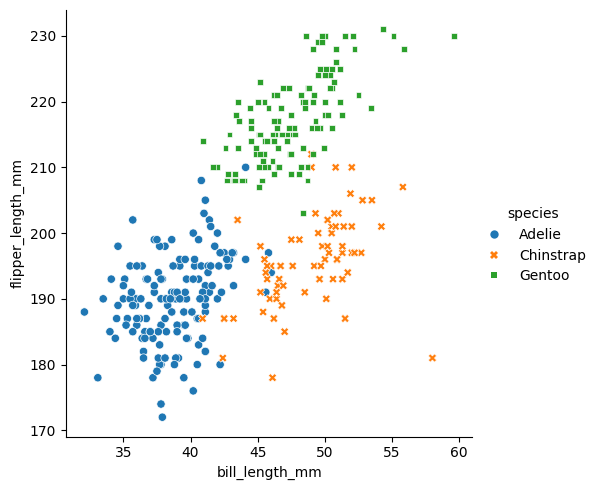

In [15]:
sns.relplot(
    penguins_long,
    kind="scatter",
    x="bill_length_mm",
    y="flipper_length_mm",
    hue="species",
    style="species",
)

The main advantage of `relplot` is that, as a figure-level function, we can now create multiple axes based on yet another grouping variable (so-called _facets_):


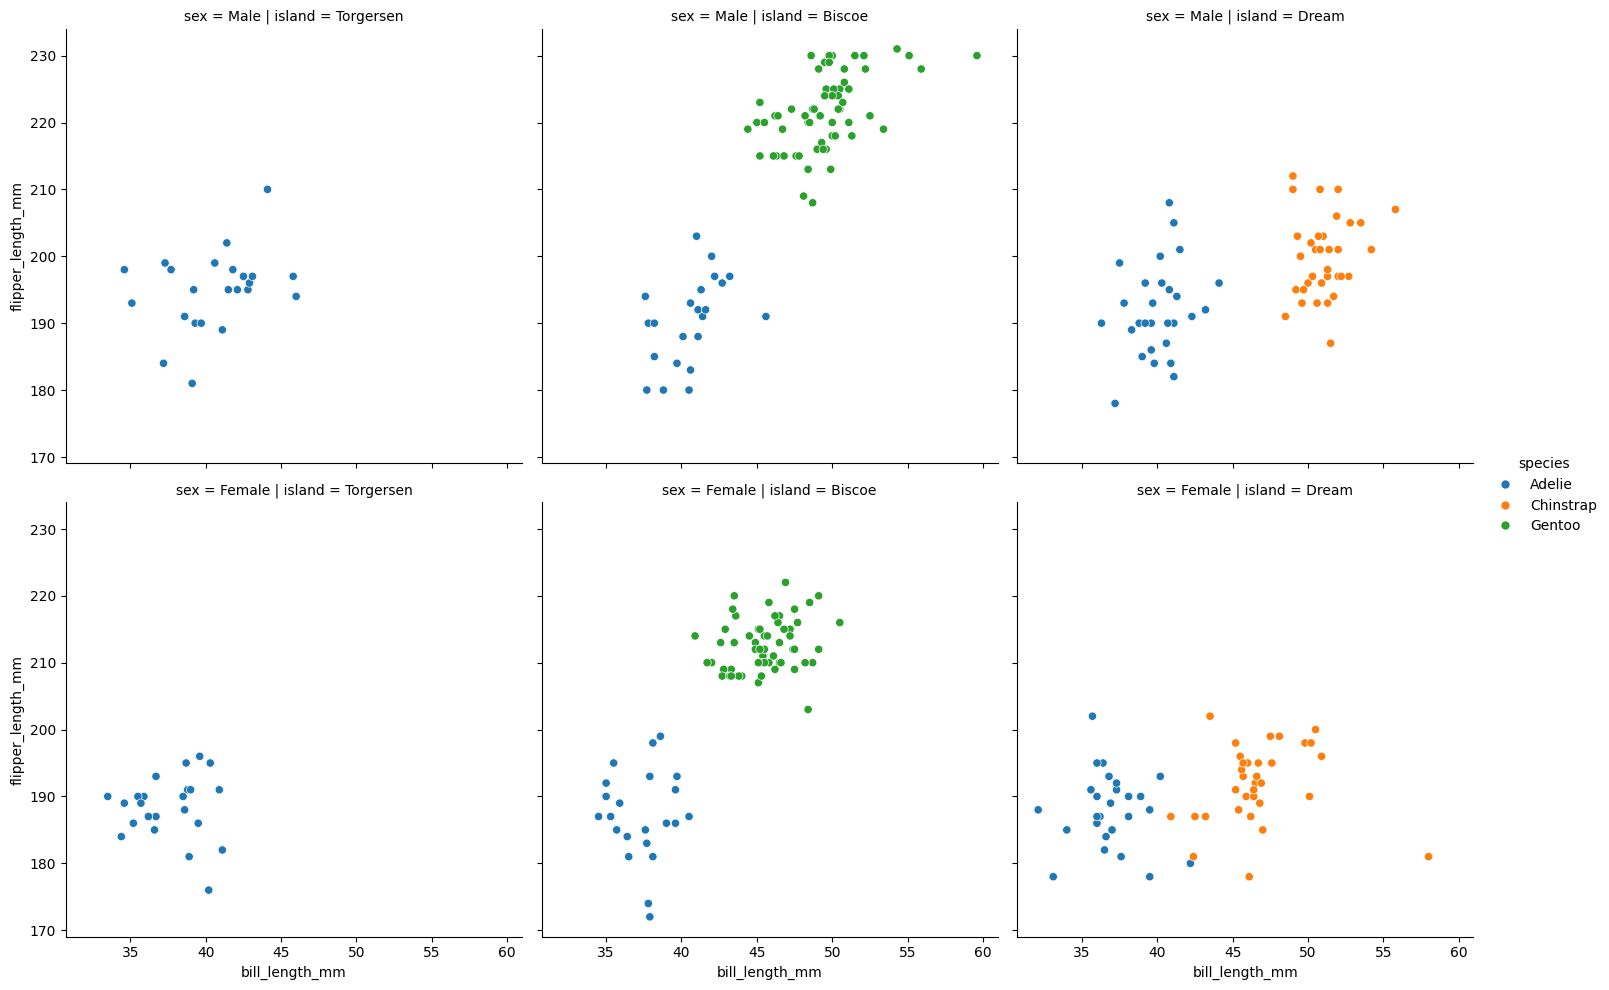

In [18]:
sns.relplot(
    penguins_long,
    kind="scatter",
    x="bill_length_mm",
    y="flipper_length_mm",
    hue="species",
    col="island",
    row="sex",
)

## Visualizing distributions of data


## Visualizing categorical data


## Creating multi-plot visualizations


## Styling figures
